In [ ]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

In [ ]:
# Read data from CSV files
data_2019_2020 = pd.read_csv('/content/transfermarkt_fbref_201920.csv', sep=';', engine='python')
data_2017_2018 = pd.read_csv('/content/transfermarkt_fbref_201718.csv', sep=';', engine='python')
data_2018_2019 = pd.read_csv('/content/transfermarkt_fbref_201819.csv', sep=';', engine='python')


# Concatenate the dataframes

merged_data = pd.concat([data_2019_2020, data_2018_2019, data_2017_2018], ignore_index=True)

# Sort the dataframe by 'player' column
merged_data.sort_values('player', inplace=True)

In [ ]:
merged_data.dropna(subset=['player'], inplace=True)

In [ ]:
player_corrected = [i for i in merged_data['player']]

In [ ]:
for indice_j,nom_j in enumerate(player_corrected) :
    tab_c = list(nom_j)
    l = len(tab_c)
    for indice_c,caractere in enumerate(tab_c) :
        if caractere == 'Ă' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xad' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x98' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '©' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c + 1] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‰' :
                    tab_c[indice_c] = 'E'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ł' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '«' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ż' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '–' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '“' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '±' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ľ' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¶' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¸' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ş' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '§' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ş' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¤' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '°' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                else :
                    tab_c[indice_c] = 'a'
                    break
        if caractere == 'Ł':
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'o' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ĺ' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ź' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'L'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xa0' :
                    tab_c[indice_c] = 'S'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ľ' :
                    tab_c[indice_c] = 'z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '»' :
                    tab_c[indice_c] = 'Z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '„' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ä' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ť' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '…' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '™' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x83' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Č' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 't'
                    del tab_c[indice_c + 1]
                    break
    player_corrected[indice_j] = "".join(tab_c)

In [ ]:
merged_data = merged_data.drop(['player'], axis=1)
merged_data.insert(0, 'player', player_corrected)


In [ ]:
merged_data.drop(columns=['Column1','Unnamed: 0', 'Attendance','birth_year', 'MP'], inplace=True)

merged_data.head()

,player,nationality,position,squad,age,value,height,position2,foot,league,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,Season
466,Aaron Connolly,ie IRL,FW,Brighton,19.0,4000000.0,175.0,Forward - Centre-Forward,right,Premier League,...,41.0,1.08,41.2,54.5,-13.3,-0.35,0.0,0.0,0.0,201920#
7066,Aaron Cresswell,eng ENG,DF,West Ham,27.0,12000000.0,170.0,Defender - Left-Back,left,Premier League,...,42.0,1.11,37.3,57.8,-20.5,-0.54,0.0,0.0,0.0,201718#
4691,Aaron Cresswell,eng ENG,DF,West Ham,28.0,10000000.0,170.0,Defender - Left-Back,left,Premier League,...,52.0,1.37,49.1,61.0,-11.9,-0.31,0.0,0.0,0.0,201819#
2576,Aaron Cresswell,eng ENG,DF,West Ham,29.0,6000000.0,170.0,Defender - Left-Back,left,Premier League,...,39.0,1.03,46.2,61.1,-14.8,-0.39,0.0,0.0,NaN,201920#
5688,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1500000.0,183.0,midfield - Attacking Midfield,left,Bundesliga,...,31.0,0.91,37.1,52.7,-15.7,-0.46,0.0,0.0,0.0,201718#


In [ ]:
#adding dummy variables to dataset
merged_data = pd.get_dummies(merged_data, columns=['league'])
merged_data = merged_data.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
merged_data = pd.get_dummies(merged_data,columns=['Season'])
merged_data = pd.get_dummies(merged_data,columns=['foot'])
#deleting potential outliers that actually contribute nothing
merged_data = merged_data[merged_data['value']>1000000]
merged_data = merged_data[merged_data['games']>5]
merged_data = merged_data[merged_data['age']>0]
merged_data = merged_data[merged_data['height']>0]

In [ ]:
data_defenders = merged_data[merged_data['position2'].str[:8] == 'Defender']

In [ ]:
data_defenders.head()

,player,nationality,position,squad,age,value,height,position2,games,games_starts,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
7066,Aaron Cresswell,eng ENG,DF,West Ham,27.0,12000000.0,170.0,Defender - Left-Back,36.0,35.0,...,False,False,True,False,True,False,False,False,True,False
4691,Aaron Cresswell,eng ENG,DF,West Ham,28.0,10000000.0,170.0,Defender - Left-Back,20.0,18.0,...,False,False,True,False,False,True,False,False,True,False
2576,Aaron Cresswell,eng ENG,DF,West Ham,29.0,6000000.0,170.0,Defender - Left-Back,31.0,31.0,...,False,False,True,False,False,False,True,False,True,False
3158,Aaron Wan-Bissaka,eng ENG,DF,Crystal Palace,20.0,35000000.0,183.0,Defender - Right-Back,35.0,35.0,...,False,False,True,False,False,True,False,False,False,True
1460,Aaron Wan-Bissaka,eng ENG,DF,Manchester Utd,21.0,32000000.0,183.0,Defender - Right-Back,35.0,34.0,...,False,False,True,False,False,False,True,False,False,True


In [ ]:
columns_with_na = data_defenders.columns[data_defenders.isna().any()].tolist()

rows_with_na_index = data_defenders[data_defenders.isna().any(axis=1)].index.tolist()

data_defenders.loc[data_defenders.player == "Adrián Diéguez"  ,"foot"] = "left"
data_defenders.loc[data_defenders.player == "Hervé Lybohy"  ,"foot"] = "left"
data_defenders.loc[data_defenders.player == "Hervé Lybohy"  ,"height"] = "187.0"
data_defenders.loc[data_defenders.player == "Juan Soriano"  ,"foot"] = "right"

data_defenders.isna().any().any()

<ipython-input-12-967922a44140>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_defenders.loc[data_defenders.player == "Adrián Diéguez"  ,"foot"] = "left"
<ipython-input-12-967922a44140>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '187.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_defenders.loc[data_defenders.player == "Hervé Lybohy"  ,"height"] = "187.0"


True

In [ ]:
data_defenders['foot'] = data_defenders['foot'].fillna('Unknown')
data_defenders = pd.get_dummies(data_defenders, columns=['foot'], drop_first=True)
from sklearn.impute import SimpleImputer
num_columns = data_defenders.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
data_defenders[num_columns] = num_imputer.fit_transform(data_defenders[num_columns])


<ipython-input-13-06cf8f4979fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_defenders['foot'] = data_defenders['foot'].fillna('Unknown')


In [ ]:
data_defenders = data_defenders.dropna()
data_defenders = data_defenders.dropna(subset=['value'])
data_defenders = data_defenders[data_defenders['value'] != 0]
data_defenders.isna().any().any()

False

In [ ]:
data_defenders.head()

,player,nationality,position,squad,age,value,height,position2,games,games_starts,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
7066,Aaron Cresswell,eng ENG,DF,West Ham,27.0,12000000.0,170.0,Defender - Left-Back,36.0,35.0,...,False,False,True,False,True,False,False,False,True,False
4691,Aaron Cresswell,eng ENG,DF,West Ham,28.0,10000000.0,170.0,Defender - Left-Back,20.0,18.0,...,False,False,True,False,False,True,False,False,True,False
2576,Aaron Cresswell,eng ENG,DF,West Ham,29.0,6000000.0,170.0,Defender - Left-Back,31.0,31.0,...,False,False,True,False,False,False,True,False,True,False
3158,Aaron Wan-Bissaka,eng ENG,DF,Crystal Palace,20.0,35000000.0,183.0,Defender - Right-Back,35.0,35.0,...,False,False,True,False,False,True,False,False,False,True
1460,Aaron Wan-Bissaka,eng ENG,DF,Manchester Utd,21.0,32000000.0,183.0,Defender - Right-Back,35.0,34.0,...,False,False,True,False,False,False,True,False,False,True


In [ ]:
# Ensure boolean features are encoded as integers (0 and 1)
data_defenders['isPremierLeague'] = data_defenders['isPremierLeague'].astype(int)
data_defenders['isLigue1'] = data_defenders['isLigue1'].astype(int)
data_defenders['isSerieA'] = data_defenders['isSerieA'].astype(int)
data_defenders['isLaLiga'] = data_defenders['isLaLiga'].astype(int)
data_defenders['isBundesliga'] = data_defenders['isBundesliga'].astype(int)


In [ ]:
def ln(x):
    return np.log(x)

In [ ]:
# Function to train and evaluate an OLS model
def train_and_evaluate_ols(data, features, random_state):
    # Split the data with a unique random state for each feature set
    trainDEF, testDEF = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    trainDEF['ln(value)'] = np.log(trainDEF['value'])
    testDEF['ln(value)'] = np.log(testDEF['value'])

    # Create the formula for the OLS model
    formula = 'ln(value) ~ ' + ' + '.join(features)

    # Train the OLS model
    modelDEF = smf.ols(formula, data=trainDEF).fit()

    # Make predictions on the test set
    testDEF['ln_value_pred'] = modelDEF.predict(testDEF)

    # Compute MSE and MAE
    mse = mean_squared_error(testDEF['ln(value)'], testDEF['ln_value_pred'])
    mae = mean_absolute_error(testDEF['ln(value)'], testDEF['ln_value_pred'])

    return mse, mae, testDEF

# Feature sets
features_1 = [
    'age', 'CL', 'goals', 'xg_xa_per90', 'passes_ground', 'touches_att_pen_area',
    'touches_def_pen_area', 'aerials_won_pct', 'isPremierLeague', 'isLigue1',
    'Pts', 'xGA', 'xG', 'isSerieA', 'isLaLiga','isBundesliga'
]

# Assuming your dataframe is named 'data_defenders'
# data_defenders = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your actual dataset

# Train and evaluate models
print('Evaluating OLS Model 1:')
ols_mse1, ols_mae1, testDEF_1 = train_and_evaluate_ols(data_defenders, features_1, random_state=42)
print(f'OLS Model 1 - MSE: {ols_mse1}, MAE: {ols_mae1}')

# Print actual vs predicted values for some players
print(f'Actual vs Predicted (ln(value)):')
print(pd.DataFrame({'Actual': testDEF_1['ln(value)'], 'Predicted': testDEF_1['ln_value_pred']}).head(10))


Evaluating OLS Model 1:
OLS Model 1 - MSE: 0.3376924743812447, MAE: 0.45607065799962104
Actual vs Predicted (ln(value)):
         Actual  Predicted
2819  16.648724  15.587325
329   15.201805  15.454331
5698  15.424948  15.462800
5631  15.830414  15.402871
2622  16.118096  15.739049
1961  14.914123  15.241269
4879  17.909855  17.431280
4256  15.424948  15.330369
5156  15.424948  15.870386
6834  15.201805  15.599430


In [ ]:
# Function to train and evaluate a Decision Tree model
def train_and_evaluate_decision_tree(data, features, random_state):
    # Split the data with a unique random state for each feature set
    trainDEF, testDEF = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    trainDEF['ln(value)'] = np.log(trainDEF['value'])
    testDEF['ln(value)'] = np.log(testDEF['value'])

    # Train the decision tree model
    modelDEF = DecisionTreeRegressor(random_state=42)
    modelDEF.fit(trainDEF[features], trainDEF['ln(value)'])

    # Make predictions on the test set
    testDEF['ln_value_pred'] = modelDEF.predict(testDEF[features])

    # Compute MSE and MAE
    mse = mean_squared_error(testDEF['ln(value)'], testDEF['ln_value_pred'])
    mae = mean_absolute_error(testDEF['ln(value)'], testDEF['ln_value_pred'])

    return mse, mae, testDEF

# Feature set for defenders
features_1 = [
    'age', 'CL', 'goals', 'xg_xa_per90', 'passes_ground', 'touches_att_pen_area',
    'touches_def_pen_area', 'aerials_won_pct', 'isPremierLeague', 'isLigue1',
    'Pts', 'xGA', 'xG', 'isSerieA', 'isLaLiga','isBundesliga'
]


# Train and evaluate models
print('Evaluating Decision Tree Model 1:')
dt_mse1, dt_mae1, testDEF_1 = train_and_evaluate_decision_tree(data_defenders, features_1, random_state=42)
print(f'Decision Tree Model 1 - MSE: {dt_mse1}, MAE: {dt_mae1}')

# Print actual vs predicted values for some players
print(f'Actual vs Predicted (ln(value)):')
print(pd.DataFrame({'Actual': testDEF_1['ln(value)'], 'Predicted': testDEF_1['ln_value_pred']}).head(10))

Evaluating Decision Tree Model 1:
Decision Tree Model 1 - MSE: 0.6564947543772998, MAE: 0.601615232038206
Actual vs Predicted (ln(value)):
         Actual  Predicted
2819  16.648724  16.012735
329   15.201805  15.761421
5698  15.424948  14.914123
5631  15.830414  14.914123
2622  16.118096  16.300417
1961  14.914123  14.731801
4879  17.909855  17.974394
4256  15.424948  15.424948
5156  15.424948  15.607270
6834  15.201805  15.607270


In [ ]:
# Function to train and evaluate a Random Forest model
def train_and_evaluate_random_forest(data, features, random_state):
    # Split the data with a unique random state for each feature set
    trainDEF, testDEF = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    trainDEF['ln(value)'] = np.log(trainDEF['value'])
    testDEF['ln(value)'] = np.log(testDEF['value'])

    # Train the random forest model
    modelDEF = RandomForestRegressor(random_state=42)
    modelDEF.fit(trainDEF[features], trainDEF['ln(value)'])

    # Make predictions on the test set
    testDEF['ln_value_pred'] = modelDEF.predict(testDEF[features])

    # Compute MSE and MAE
    mse = mean_squared_error(testDEF['ln(value)'], testDEF['ln_value_pred'])
    mae = mean_absolute_error(testDEF['ln(value)'], testDEF['ln_value_pred'])

    return mse, mae, testDEF

# Feature set for defenders
features_1 = [
    'age', 'CL', 'goals', 'xg_xa_per90', 'passes_ground', 'touches_att_pen_area',
    'touches_def_pen_area', 'aerials_won_pct', 'isPremierLeague', 'isLigue1',
    'Pts', 'xGA', 'xG', 'isSerieA', 'isLaLiga','isBundesliga'
]


# Train and evaluate models
print('Evaluating Random Forest Model 1:')
rf_mse1, rf_mae1, testDEF_1 = train_and_evaluate_random_forest(data_defenders, features_1, random_state=42)
print(f'Random Forest Model 1 - MSE: {rf_mse1}, MAE: {rf_mae1}')

print(f'Actual vs Predicted (ln(value)):')
print(pd.DataFrame({'Actual': testDEF_1['ln(value)'], 'Predicted': testDEF_1['ln_value_pred']}).head(10))


Evaluating Random Forest Model 1:
Random Forest Model 1 - MSE: 0.2957107357172314, MAE: 0.4180397212590001
Actual vs Predicted (ln(value)):
         Actual  Predicted
2819  16.648724  15.763265
329   15.201805  15.580780
5698  15.424948  15.004404
5631  15.830414  15.495847
2622  16.118096  15.357446
1961  14.914123  15.095743
4879  17.909855  17.781847
4256  15.424948  15.264583
5156  15.424948  16.074725
6834  15.201805  15.376045


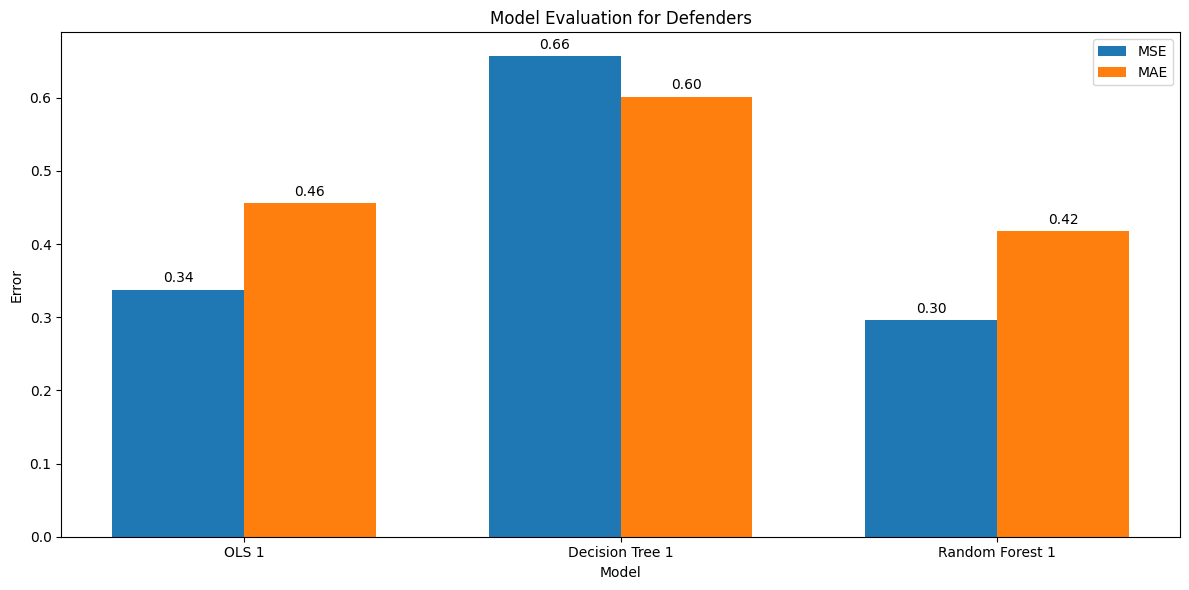

In [ ]:
# Collecting results
labels = ['OLS 1', 'Decision Tree 1', 'Random Forest 1']
mse_values = [ols_mse1, dt_mse1, rf_mse1]
mae_values = [ols_mae1, dt_mae1, rf_mae1]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Model Evaluation for Defenders')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
